In [1]:
%cd "/content/drive/MyDrive/Image Classification/CLS - tensorflow 2"

/content/drive/MyDrive/Image Classification/CLS - tensorflow 2


In [2]:
import cv2
import numpy as np
import torch
import torchvision
import torchvision.transforms.functional as TF
from visualizer import *
from augmenter import *

In [3]:
def detach(tensor):
    return tensor.detach().cpu().numpy()


def torch2image(tensor):
  img = detach(tensor)
  if len(img.shape) == 4:
      img = np.transpose(img, [0, 2, 3, 1])
  else:
      img = np.transpose(img, (1, 2, 0))
  return img

def compair_image(img1, img2):
    return (img1 == img2).sum() == img1.shape[0] * img1.shape[1] * img1.shape[2]

def visual_image_on(images, titles, verbose=True):
    if not isinstance(images, (tuple, list)):
        images = [images]
    if not isinstance(titles, (tuple, list)):
        titles = [titles]

    if verbose:
        visual_image(images, titles)

In [33]:
visual_on = False
img_path = "/content/drive/MyDrive/Datasets/test.png"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orin_image = image.copy()

torch_image = torch.from_numpy(np.transpose(image, (2, 0, 1)).copy())
visual_image_on(image, 'image', visual_on)


# Geometric Transforms


## Pad


In [34]:
self_image = Pad(224, fill=128)([image])[0]

ta_image = torchvision.transforms.Pad(224, fill=128)(torch_image)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)


tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (1806, 1522, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 135.037 >
tensor torch infomation < shape: (1806, 1522, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 135.037 >
True


## Flip

In [35]:
self_image = Flip('v')([image])[0]
visual_image_on(self_image, 'self', visual_on)

In [36]:
self_image = RandomFlip('v')([image])[0]
visual_image_on(self_image, 'self', visual_on)

In [37]:
self_image = RandomVerticalFlip()([image])[0]
visual_image_on(self_image, 'self', visual_on)

## Resize

In [38]:
self_image = Resize((512, 512))([image])[0]

ta_image = torchvision.transforms.Resize((512, 512))(torch_image)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (512, 512, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 141.193 >
tensor torch infomation < shape: (512, 512, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 141.262 >
False


## Crop

In [39]:
self_image = Crop(10, 30, 400, 700)([image])[0]

ta_image = TF.crop(torch_image, 10, 30, 400, 700)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (400, 700, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 202.571 >
tensor torch infomation < shape: (400, 700, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 202.571 >
True


In [40]:
self_image = RandomCrop((1000, 1000), padding=400, fill=127, padding_mode='symmetric')([image])[0]
visual_image_on(self_image, 'self', visual_on)
# ta_image = torchvision.transforms.v2.RandomCrop((512, 512))(torch_image)
# visual_image([self_image, torch2image(ta_image)], ['self', 'torch'])

In [41]:
self_image = CenterCrop((512, 512))([image])[0]

ta_image = torchvision.transforms.CenterCrop((512, 512))(torch_image)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)


tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (512, 512, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 104.394 >
tensor torch infomation < shape: (512, 512, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 104.394 >
True


In [42]:
self_image = ResizedCrop(10, 40, 600, 800, 224)([image])[0]
visual_image_on(self_image, 'self', visual_on)

In [43]:
self_image = RandomResizedCrop((512, 512))([image])[0]

ta_image = torchvision.transforms.RandomResizedCrop((512, 512))(torch_image)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)


tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (512, 512, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 119.853 >
tensor torch infomation < shape: (512, 512, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 216.279 >
False


## Affine

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 114.987 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 115.015 >
False


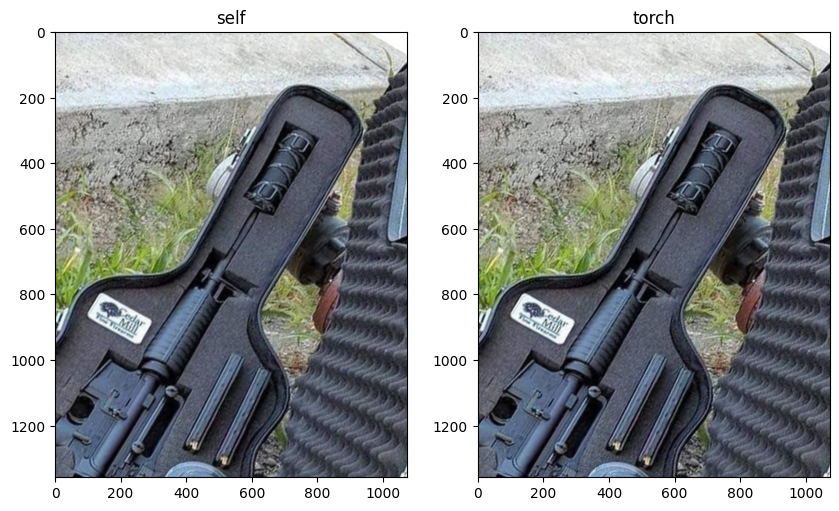

In [44]:
self_image = Affine(30, (25, 25), 2, 3)([image])[0]

ta_image = TF.affine(torch_image, 30, (25, 25), 2, 3)
visual_image([self_image, torch2image(ta_image)], ['self', 'torch'])

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 22.892 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 14.527 >
False


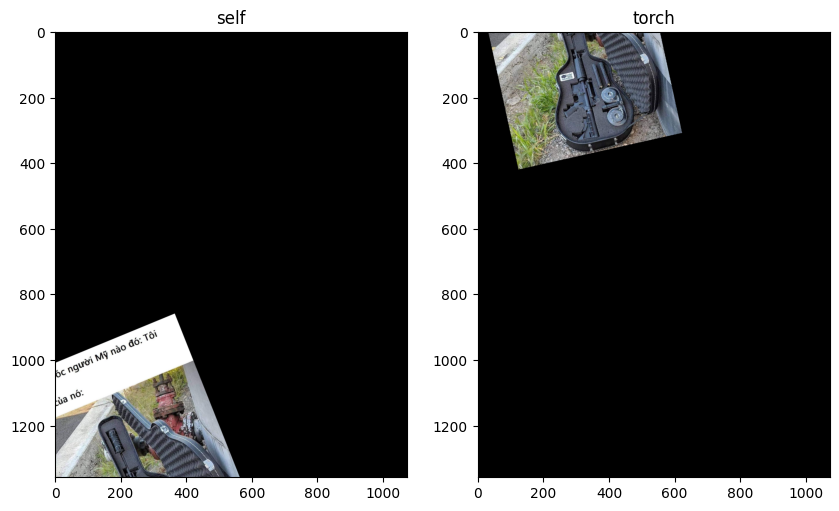

In [45]:
self_image = RandomAffine(30, (0.3, 0.9), (0.2, 1.4), 1)([image])[0]

ta_image = torchvision.transforms.RandomAffine(30, (0.3, 0.9), (0.2, 1.4), 1)(torch_image)
visual_image([self_image, torch2image(ta_image)], ['self', 'torch'])


tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

## Affine6

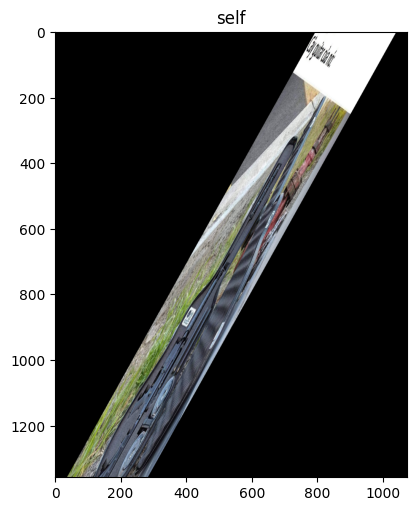

In [46]:
self_image = Affine6(30, (0.3, 0.9), (0.2, 1.4), 1)([image])[0]

visual_image([self_image], ['self'])

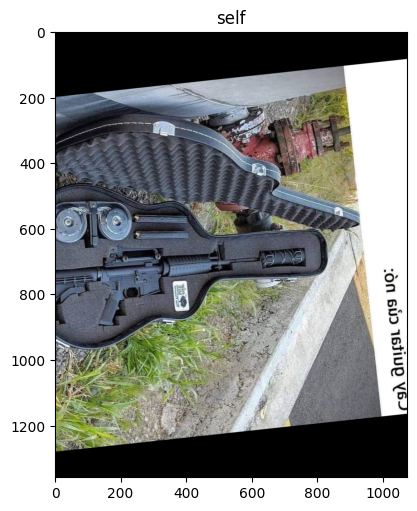

In [47]:
self_image = RandomAffine6(30, (0.3, 0.9), (0.2, 1.4), 1)([image])[0]

visual_image([self_image], ['self'])

## Rotate


tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 115.157 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 115.153 >
False


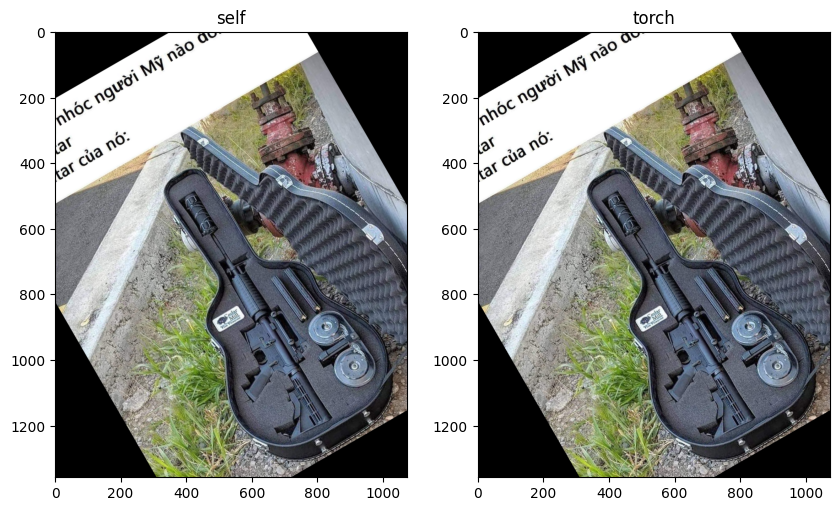

In [48]:
self_image = Rotation(-30)([image])[0]

ta_image = TF.rotate(torch_image, 30)
visual_image([self_image, torch2image(ta_image)], ['self', 'torch'])

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 114.014 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 132.544 >
False


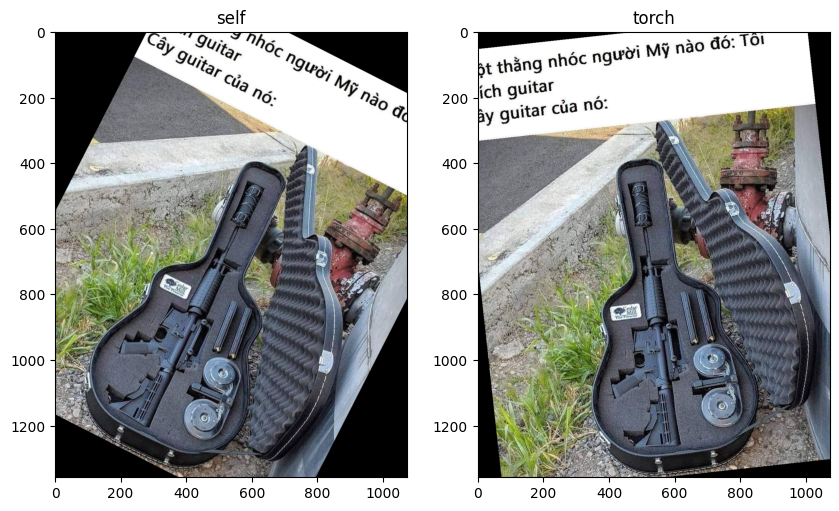

In [49]:
self_image = RandomRotation(30)([image])[0]

ta_image = torchvision.transforms.RandomRotation(30)(torch_image)
visual_image([self_image, torch2image(ta_image)], ['self', 'torch'])

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

## Perspective

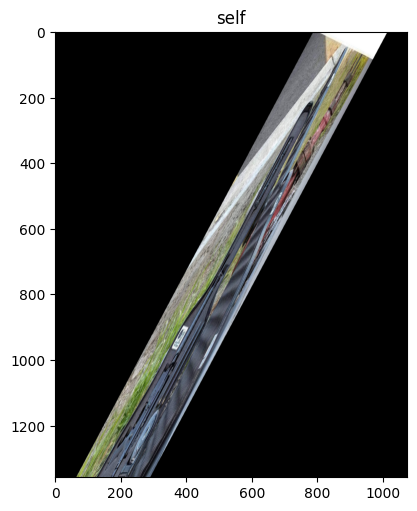

In [50]:
self_image = Perspective(10, 10, 20, 30, (0.2, 0.8), (0.2, 1.8))([image])[0]

visual_image([self_image], ['self'])

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 109.103 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 66.474 >
False


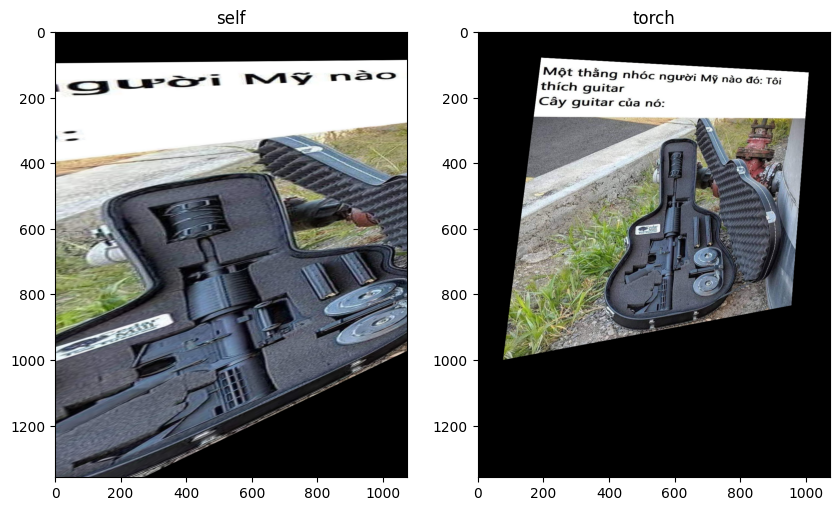

In [51]:
self_image = RandomPerspective(10, 10, 20, 30, (0.2, 0.8), (0.2, 1.8))([image])[0]

ta_image = torchvision.transforms.RandomPerspective(0.8)(torch_image)
visual_image([self_image, torch2image(ta_image)], ['self', 'torch'])

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

# Photometric Transforms


## Base

### ChannelShuffle

In [52]:
self_image = ChannelShuffle()([image])[0]

visual_image_on(self_image, 'self', visual_on)
tensor_value_info(image, 'image')
tensor_value_info(self_image, 'self')
print(compair_image(self_image, image))

tensor image infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 141.262 >
tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 141.262 >
False


### Colorjitter

In [53]:
self_image = ColorJitter(4, 2, 3, 0.4)([image])[0]

ta_image = torchvision.transforms.ColorJitter(4, 2, 3, 0.4)(torch_image)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 166.454 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 208.808 >
False


## Arithmetic

### Erasing


In [54]:
self_image = Erasing()([image])[0]
visual_image_on(self_image, 'self_image', visual_on)

### Inversion

In [55]:
self_image = Inversion()([image])[0]
visual_image_on(self_image, 'self_image', visual_on)

## Blends

### BlendRandomImage

In [56]:
self_image = BlendRandomImage(0.4)([image])[0]
visual_image_on(self_image, 'self_image', visual_on)

## Blurs

### Gaussian Blur

In [57]:
self_image = GaussianBlur()([image])[0]
visual_image_on(self_image, 'self_image', visual_on)

### Median Blur

In [58]:
self_image = MedianBlur()([image])[0]
visual_image_on(self_image, 'self_image', visual_on)

### Motion Blur

In [59]:
self_image = MotionBlur()([image])[0]
visual_image_on(self_image, 'self_image', visual_on)

### Variable Blur

In [60]:
self_image = VariableBlur()([image])[0]
visual_image_on(self_image, 'self_image', visual_on)

## Colors

### Grayscale

In [61]:
self_image = Grayscale(3)([image])[0]

ta_image = torchvision.transforms.Grayscale(3)(torch_image)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 141.964 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 254.000 mean: 141.408 >
False


### Hue

In [62]:
self_image = AdjustHue(0.4)([image])[0]

ta_image = TF.adjust_hue(torch_image, 0.4)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 139.940 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 139.962 >
False


In [63]:
self_image = RandomAdjustHue((-0.4, 0.5))([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Saturation

In [64]:
self_image = AdjustSaturation(3)([image])[0]

ta_image = TF.adjust_saturation(torch_image, 3)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 140.283 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 141.477 >
False


In [65]:
self_image = RandomAdjustSaturation((0.1, 4))([image])[0]
visual_image_on(self_image, 'self', visual_on)

## Contrastions

### CLAHE

In [66]:
self_image = CLAHE()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Contrast

In [67]:
self_image = AdjustContrast(3)([image])[0]

ta_image = TF.adjust_contrast(torch_image, 3)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 121.256 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 121.663 >
False


In [68]:
self_image = RandomAdjustContrast((2, 4))([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Gamma

In [69]:
self_image = AdjustGamma(3)([image])[0]

ta_image = TF.adjust_gamma(torch_image, 3)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 79.452 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 79.618 >
False


In [70]:
self_image = RandomAdjustGamma((0.4, 2))([image])[0]

visual_image_on(self_image, 'self', visual_on)

## Distortions

### Dirt Effect Modification

In [71]:
self_image = DirtEffectModification()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Erosion

In [72]:
self_image = Erosion()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Dilation

In [73]:
self_image = Dilation()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Scratches

In [74]:
self_image = Scratches()([image])[0]
visual_image_on(self_image, 'self', visual_on)

## Lighting

### Brightness

In [75]:
self_image = AdjustBrightness(3)([image])[0]

ta_image = TF.adjust_brightness(torch_image, 3)
visual_image_on([self_image, torch2image(ta_image)], ['self', 'torch'], visual_on)

tensor_value_info(self_image, 'self')
tensor_value_info(torch2image(ta_image), 'torch')
print(compair_image(self_image, torch2image(ta_image)))

tensor self infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 230.395 >
tensor torch infomation < shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 230.395 >
True


In [76]:
self_image = RandomAdjustBrightness((0, 4))([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Camera Flare

In [77]:
self_image = CameraFlare()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Flashlight

In [78]:
self_image = Flashlight()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Halo Effect

In [79]:
self_image = HaloEffect()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Linear Gradient

In [80]:
self_image = LinearGradient()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Radial Gradient

In [81]:
self_image = RadialGradient()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Smudges

In [82]:
self_image = Smudges()([image])[0]
visual_image_on(self_image, 'self', visual_on)

## Noises

### Gaussian Noise

In [83]:
self_image = GaussianNoise(0.2, 0.5)([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Jpeg Noise

In [84]:
self_image = JpegNoise()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Pixelize

In [85]:
self_image = Pixelize()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Poisson Noise

In [86]:
self_image = PoissonNoise()([image])[0]
visual_image_on(self_image, 'self', visual_on)

### Salt Pepper Noise

In [87]:
self_image = SaltPepperNoise(0.5)([image])[0]
visual_image_on(self_image, 'self', visual_on)